In [1]:
# 测试反向求导功能
from core import *
import numpy as np

In [2]:
a = Tensor.from_numpy(np.array([1, 2], dtype=np.float32),dtype="float32")
b = Tensor.from_numpy(np.array([3, 4], dtype=np.float32),dtype="float32")

c = a + b

d = Tensor.from_numpy(numpy_array=np.array([2, 3], dtype=np.float32),dtype="float32")

e = c * d

f = Tensor.make_const(np.array([1, 1], dtype=np.float32))

In [3]:
y = f + e

In [4]:
y.backward()

In [5]:
a.grad.data

array([2., 3.])

In [6]:
from DataTools import *

iris_dataset = DataSet(data_path='iris.csv', data_type='csv')

In [20]:
iris_loader = DataLoader(iris_dataset, batch_size=8, shuffle=True)

In [28]:
for data, labels in iris_loader:
    print(f"data: \n {data}, \n labels: \n {labels}")
    break

data: 
 [[5.20e+01 6.40e+00 3.20e+00 4.50e+00 1.50e+00]
 [1.15e+02 5.80e+00 2.80e+00 5.10e+00 2.40e+00]
 [1.23e+02 7.70e+00 2.80e+00 6.70e+00 2.00e+00]
 [4.90e+01 5.30e+00 3.70e+00 1.50e+00 2.00e-01]
 [2.70e+01 5.00e+00 3.40e+00 1.60e+00 4.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [2.30e+01 4.60e+00 3.60e+00 1.00e+00 2.00e-01]
 [3.80e+01 4.90e+00 3.60e+00 1.40e+00 1.00e-01]], 
 labels: 
 ['versicolor' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa']


In [23]:
mnist_dataset = DataSet(['train-images-idx3-ubyte', 'train-labels-idx1-ubyte'], data_type='mnist')

In [17]:
mnist_dataloader = DataLoader(mnist_dataset, batch_size=8, shuffle=True)

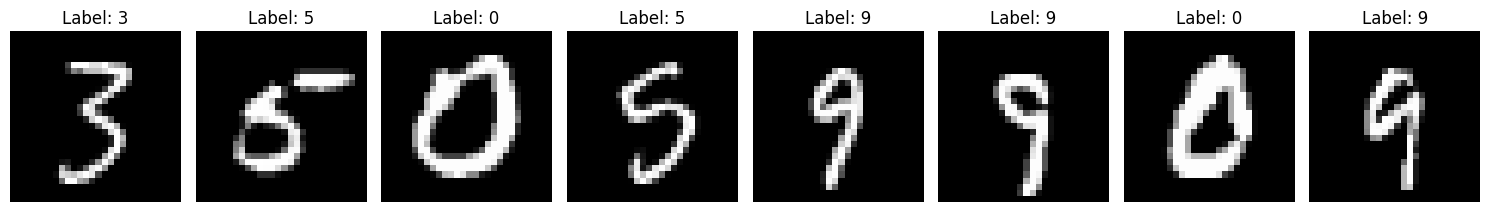

In [33]:
import matplotlib.pyplot as plt


for data, labels in mnist_dataloader:
    fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        img = data[i]
        if img.shape[0] == 1:
            img = img.squeeze(0)  # 去掉单通道维度

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')  # 隐藏坐标轴

    plt.tight_layout()
    plt.show()
    break